# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


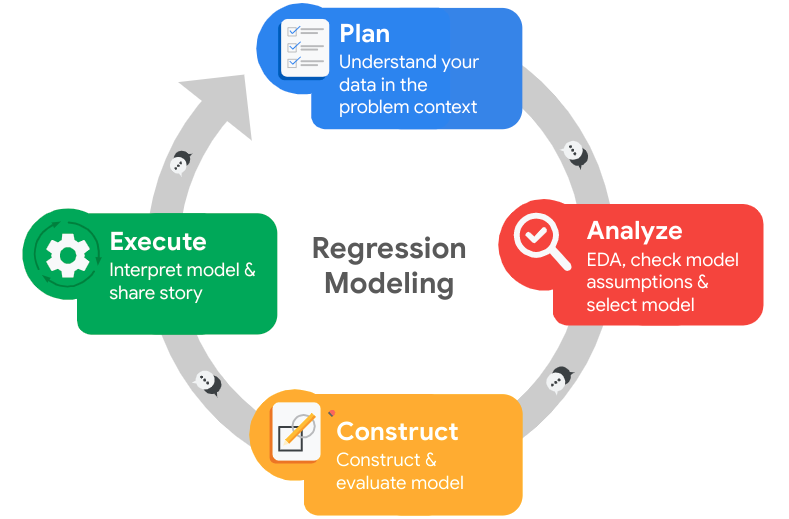

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders would be the HR department, as well as company leadership (i.e., executives and management).

2. The goal is to build a predictive model that identifies employees who are likely to leave the company, based on the data collected by HR. By identifying these employees and the factors leading to their departure, the company can take proactive measures to improve retention and employee satisfaction, reducing costs related to turnover and recruitment.

3. The dataset consists of 15,000 rows and 10 columns, representing various aspects of an employee's work life, including satisfaction, performance, projects, hours worked, tenure, and whether they left the company. Employee satisfaction levels, last evaluation scores, average monthly hours worked, number of projects, and length of service are critical numerical predictors. Categorical variables include whether the employee experienced a work accident, received a promotion, their department, and salary level. The target variable is whether an employee has left the company (binary classification).Low satisfaction levels, lack of promotion, high or low hours worked, and being involved in many or too few projects might correlate with an employee's decision to leave the company.

4. I'm going to use various Python libraries such as pandas, numpy, matplotlib, seaborn, sklearn, xgboost, and pickle.

5. Yes, there are several ethical considerations. I'd like to ensure data privacy, especially sensitive information such as performance evaluations, salaries, and personal attributes. I'd also like to avoid bias in the model that could unfairly target certain groups (e.g., low-salary employees or employees from certain departments). It’s important to ensure that the model is fair and doesn’t disproportionately recommend actions against certain demographic groups or types of employees. Finally, I'd like to be transparent with employees about how their data is being used, ensuring that predictions are not used to unfairly penalize or preemptively terminate employees based on statistical predictions rather than actual performance or behavior.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(n=10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

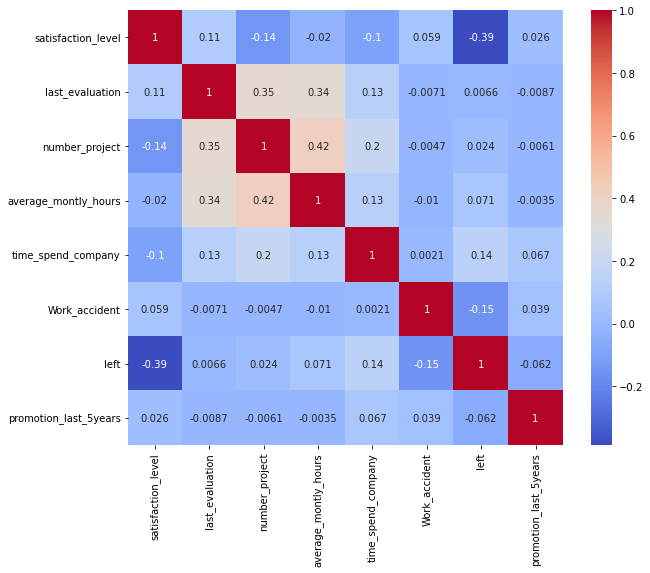

In [7]:
# Correlation matrix
corr_matrix = df0.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()


3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = "first")


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

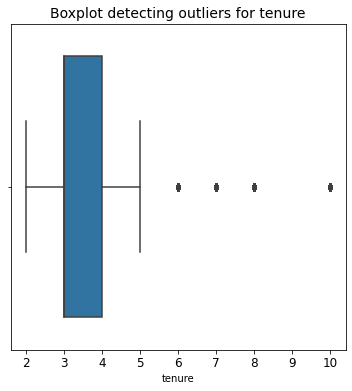

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot detecting outliers for tenure', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()



In [14]:
# Determine the number of rows containing outliers
# Compute the 25th and 75th percentile values in "tenure"
percentile25 = df1["tenure"].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# Compute the IQR in "tenure"
iqr = percentile75 - percentile25

# Define the upper and lower limits for non-outlier values in "tenure"
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in "tenure"
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count no. of rows containing outliers in "tenure"
print("No. of rows containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
No. of rows containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. There doesn't seem to be any standout relationships between the variables according to the heatmap above.

2. Nothing seems out of the ordinary. Data appears normally distributed across all variables.

3. I removed duplicates and renamed column names.

4. It helps with understadning the data better, identifying data distributions and possible relationships. It is also used to clean the data and handle missing values, outliers, and inconsistencies in the data. 

5. I used pandas to drop duplicates from the dataframe.

6. Somewhat, yes. Although the personal details of the employees are not included in the dataset, their performance is still associated with a row in the dataset.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

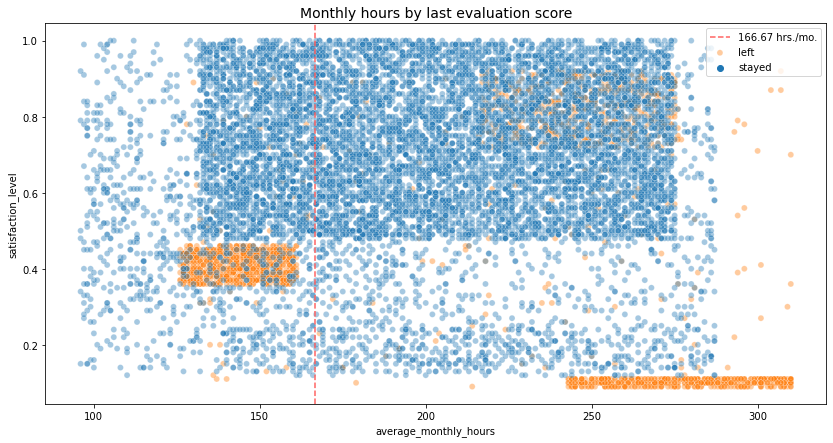

In [26]:
# Average monthly hours versus satisfaction levels
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The scatterplot above highlights a significant group of employees who worked approximately 240 to 315 hours per month. This would represent over 75 hours per week year-round, which could explain why their satisfaction levels were nearly zero.

The plot also reveals another group who left the company, despite having less typical working hours. However, their satisfaction levels were still only around 0.4. While it's difficult to determine why they might have left based, perhaps they felt pressured to work more, given that many of their colleagues were working longer hours, which could have negatively impacted their satisfaction.

Lastly, there is a group working between 210 and 280 hours per month, with satisfaction levels ranging from 0.7 to 0.9. Again, it's unclear why this group would have left.

One important note: the unusual shape of these distributions suggests potential data manipulation or synthetic data.

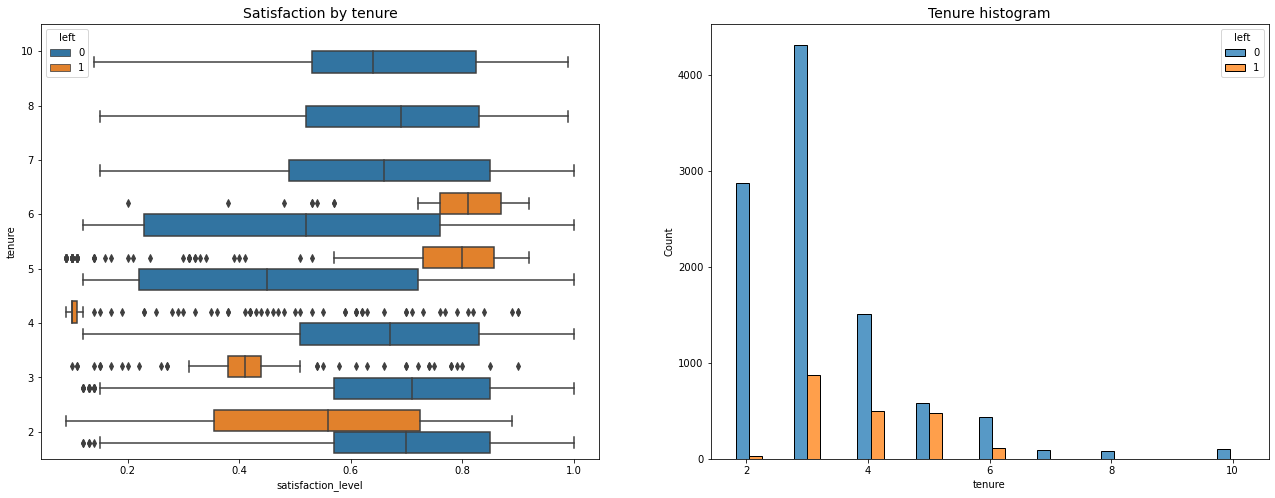

In [17]:
# Satisfaction levels by tenure
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are several insights that can be drawn from the plots above.

First, employees who left the company generally fall into two broad categories: those with shorter tenures who were dissatisfied, and those with medium-length tenures who were highly satisfied.

Additionally, employees with four years of tenure who left appear to have an unusually low satisfaction level. This could indicate a need to investigate any company policies or changes that might have specifically impacted employees at the four-year mark.

Interestingly, the longest-tenured employees did not leave the company. Their satisfaction levels were similar to those of newer employees who chose to stay.

Finally, the histogram indicates a relatively small number of longer-tenured employees, suggesting they might hold higher-ranking or better-compensated positions within the company.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

The mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be left-skewed.


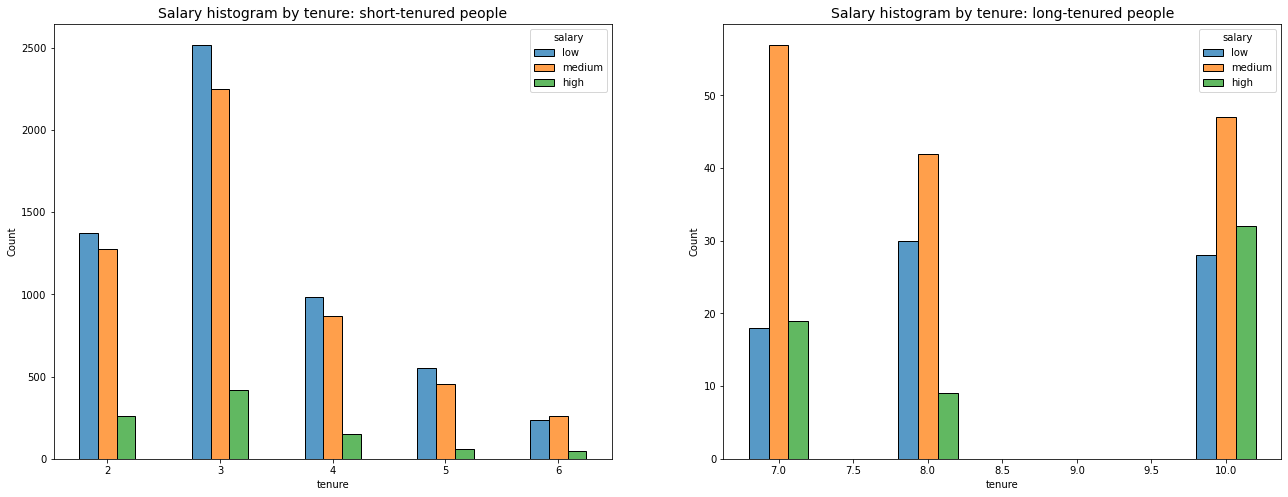

In [19]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');


The plots above indicate that long-tenured employees were not disproportionately represented by higher-paid employees.

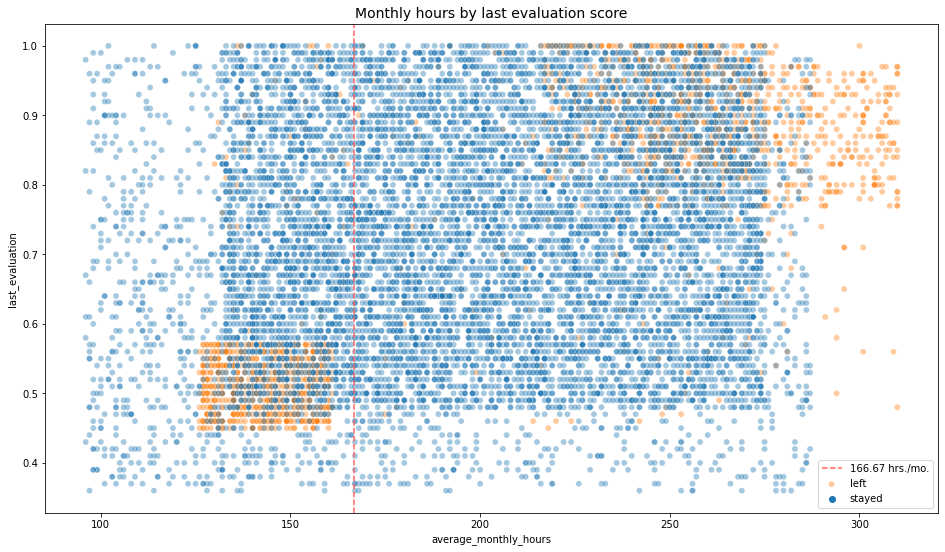

In [20]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The scatterplot reveals several key observations:

Two distinct groups of employees who left can be identified: one consisting of overworked employees with high performance, and another of employees working slightly below the nominal monthly average of 166.67 hours, who had lower evaluation scores.
There appears to be a correlation between hours worked and evaluation scores.
The upper left quadrant of the plot has relatively few employees, indicating that long hours alone do not guarantee a high evaluation score.
A majority of employees at this company work well beyond 167 hours per month.


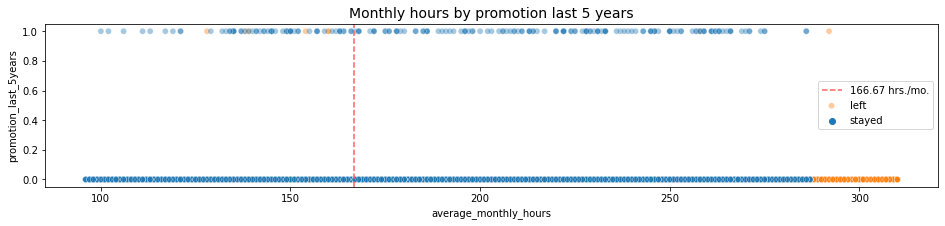

In [21]:
# Create a plot as needed
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


The plot above reveals the following insights:

Only a small number of employees who were promoted within the last five years chose to leave the company.
Very few of the employees who worked the most hours received promotions.
All of the employees who left were among those working the longest hours.

In [22]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

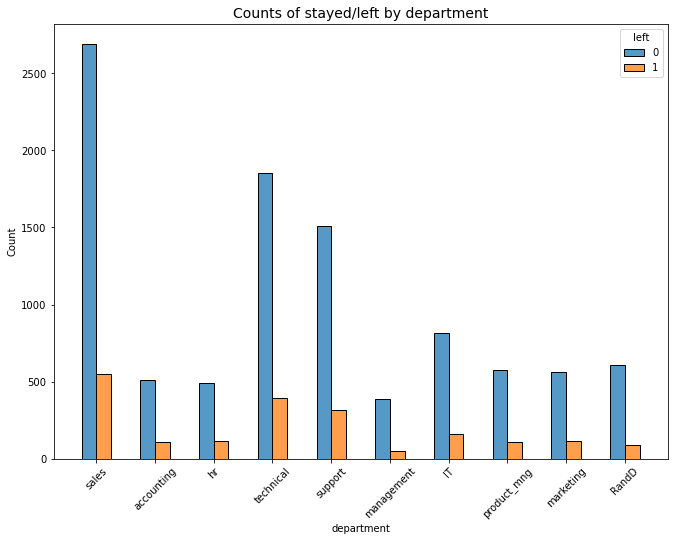

In [23]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);


The plot indicates that no single department stands out in terms of having a significantly different proportion of employees who left compared to those who stayed.

### Insights

The data suggests that employee departures are largely driven by poor management. High turnover is associated with longer working hours, handling multiple projects, and generally lower satisfaction levels. It can be demotivating for employees to work extensive hours without receiving promotions or strong evaluation scores. A considerable number of employees appear to be experiencing burnout. Interestingly, employees who have been with the company for more than six years are less likely to leave, and these employees are not necessarily well-paid.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. One notable point is the high precision and recall values for the decision tree model, which indicate that the model performs exceptionally well. However, the random forest, despite its modest improvement, might be leveraging similar features as the decision tree. This could suggest potential overfitting or data leakage, especially if the last_evaluation feature is highly influential. Additionally, the high accuracy of the decision tree could indicate that the model might not be generalizing well to unseen data.

2. The independent variables chosen for the model include: last_evaluation, number_project, tenure, and overworked. These variables were selected based on their high importance scores in the decision tree and random forest models.

3. The models, especially the decision tree, show strong performance metrics (high AUC, precision, recall, f1-score, and accuracy), indicating a good fit to the training data. However, the high performance also raises concerns about overfitting, as the model may perform well on the training set but not generalize to new, unseen data. Validation on a separate test set is crucial for assessing true performance.

4. Feature Engineering: Removing or modifying the last_evaluation feature to avoid potential data leakage. Investigating other features like performance or satisfaction scores could provide additional insights. Model Tuning: Experimenting with different hyperparameters for the random forest model to potentially improve performance further. Cross-validation: Implementing cross-validation techniques to ensure that the model generalizes well across different subsets of the data.

5. Scikit-learn: For model implementation and tuning. Pandas: For data manipulation and preprocessing. Matplotlib/Seaborn: For plotting and visualizing feature importances. Kaggle: For dataset and discussions related to model evaluation.

6. Ensure the model does not disproportionately impact specific groups based on tenure, workload, or evaluation scores. Aim for fairness and avoid reinforcing existing biases. Handle employee data with care, ensuring confidentiality and compliance with data protection regulations. Be transparent about how model predictions are used in decision-making processes. Employees should understand how their data contributes to these predictions.Finally, use the insights from the model to create positive changes that enhance employee well-being, rather than focusing solely on punitive measures.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This task is indeed a binary classification problem, where the goal is to predict whether an employee will leave the company (represented by a 1) or remain (represented by a 0). In this context, features such as working hours, evaluation scores, number of projects, and satisfaction levels can be used to train a classification model to make predictions about employee attrition.

### Identify the types of models most appropriate for this task.

Given that the variable that is being predicted is categorical (whether an employee leaves the company or not), there are two primary options for modeling:

Logistic Regression: This approach is suitable for binary classification tasks and is relatively straightforward. It estimates the probability of an employee leaving based on the features and provides interpretable coefficients that indicate the impact of each feature on the likelihood of leaving.

Tree-based Machine Learning Models: These models, such as Decision Trees, Random Forests, or Gradient Boosting Machines, can capture complex relationships and interactions between features. They are often more flexible and can handle non-linear relationships better than logistic regression.

### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic regression

Let's get the ball rolling and begin with some logistic regression. Specifically, binomial logistic regression is appropriate for this task as it deals with binary classification.

Before splitting the data, make sure to encode the non-numeric variables. There are two: department and salary.

Department is a categorical variable, so you can create dummy variables for it in the model.

Salary is also categorical but is ordinal. Since there is a hierarchy among the categories, it’s preferable to convert the levels to numbers (0–2) rather than creating dummy variables.

In [27]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


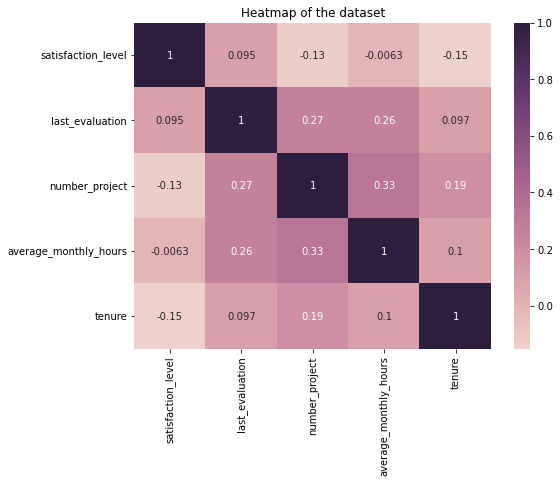

In [30]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heatmap of the dataset')
plt.show()

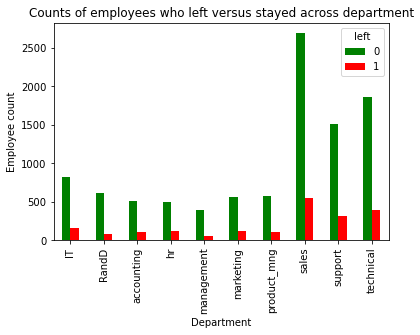

In [37]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='gr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

As logistic regression is quite sensitive to outliers, removing the outliers in the tenure column that were previously identified would be a good call.

In [38]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [40]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [42]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [43]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

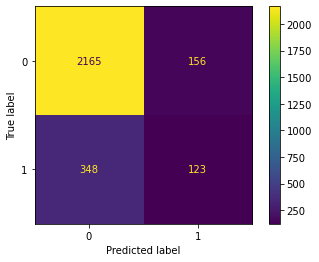

In [44]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant shows the number of true negatives. The upper-right quadrant shows the number of false positives. The bottom-left quadrant shows the number of false negatives. The bottom-right quadrant shows the number of true positives.

True Negatives: The count of individuals who did not leave, and the model correctly predicted they would not leave.
False Positives: The count of individuals who did not leave, but the model incorrectly predicted they would leave.
False Negatives: The count of individuals who left, but the model incorrectly predicted they would not leave.
True Positives: The count of individuals who left, and the model correctly predicted they would leave.

In [45]:
# Check class balance in the data
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The data has an approximate split of 83%-17%. While it is not perfectly balanced, it is not overly imbalanced either. If the imbalance were more severe, you might consider resampling the data to achieve a better balance. In this instance, you can proceed with the data as is and continue evaluating the model without adjusting the class balance.

In [46]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Tree-based model

Now, I'd like to attempt constructing decision tree and random forest models.

In [47]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [48]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree: Round 1

In [50]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Now, it's time to fit the decision tree model to the training data

In [53]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.67 s, sys: 308 ms, total: 2.98 s
Wall time: 2.98 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [54]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [55]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong score, suggesting the model can predict which employees are likely to leave.

In [56]:
# Create fuction that extracts all the scores from the grid search
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [57]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


These scores are all pretty high, indicating good model performance.

### Random forest: Round 1

In [58]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
rf1.fit(X_train, y_train) # Run time: ~10 min

CPU times: user 9min 31s, sys: 8.39 s, total: 9min 39s
Wall time: 9min 40s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [90]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Define functions to pickle the model and read in the model.

In [78]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [79]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [91]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [92]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [93]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [94]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [95]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores for the random forest model are generally better than those for the decision tree model, except for recall, where the random forest model's score is about 0.001 lower—a negligible difference. This suggests that the random forest model typically outperforms the decision tree model.

In [96]:
# Define a function that gets all scores from a model's predictions
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [97]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores closely match the validation scores, which is a positive indicator. This suggests that the model is robust. Since this test set was exclusively used for this model, its performance on this data is likely indicative of how it will perform on new, unseen data.

### Feature engineering
The high evaluation scores may be questionable, as there could be potential data leakage. Data leakage occurs when information that should not be used during training ends up influencing the model, either because it appears in the test data or because it wouldn't be available in a real-world deployment. This can lead to inflated performance metrics that don’t hold up in production.

In this case, the company might not have satisfaction levels reported for all employees, and the average_monthly_hours column could be another source of leakage. If employees who have already decided to quit or have been identified by management as potential terminations are working fewer hours, this might skew the results.

The initial decision tree and random forest models used all available variables. For the next round, feature engineering will be applied to enhance the models.

In [99]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [101]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is roughly the average number of monthly hours for someone working 50 weeks per year, 5 days per week, and 8 hours per day.

Overworked could be defined as working more than 175 hours per month on average.

In [102]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [103]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [104]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [105]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree: Round 2

In [106]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [107]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.29 s, sys: 11.4 ms, total: 2.3 s
Wall time: 2.3 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [108]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [109]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [110]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores decreased, which is expected since fewer features were considered in this iteration of the model. Nonetheless, the scores remain quite strong.

### Random forest: Round 2

In [111]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
%%time
rf2.fit(X_train, y_train) # Run time: 7min 5s

CPU times: user 7min 4s, sys: 1.51 s, total: 7min 6s
Wall time: 7min 6s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [113]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [114]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [115]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [116]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [117]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores dropped slightly again, but the random forest outperforms the decision tree when using AUC as the key metric.

In [118]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


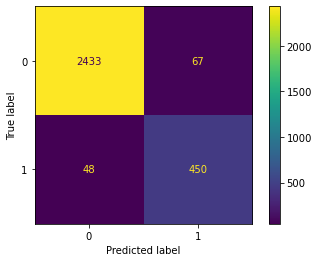

In [119]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, meaning some employees might be incorrectly flagged as at risk of quitting or being fired when they are not. Despite this, the model remains robust.

For exploratory purposes, consider examining the decision tree model’s splits and the most important features in the random forest model.

### Decision tree splits

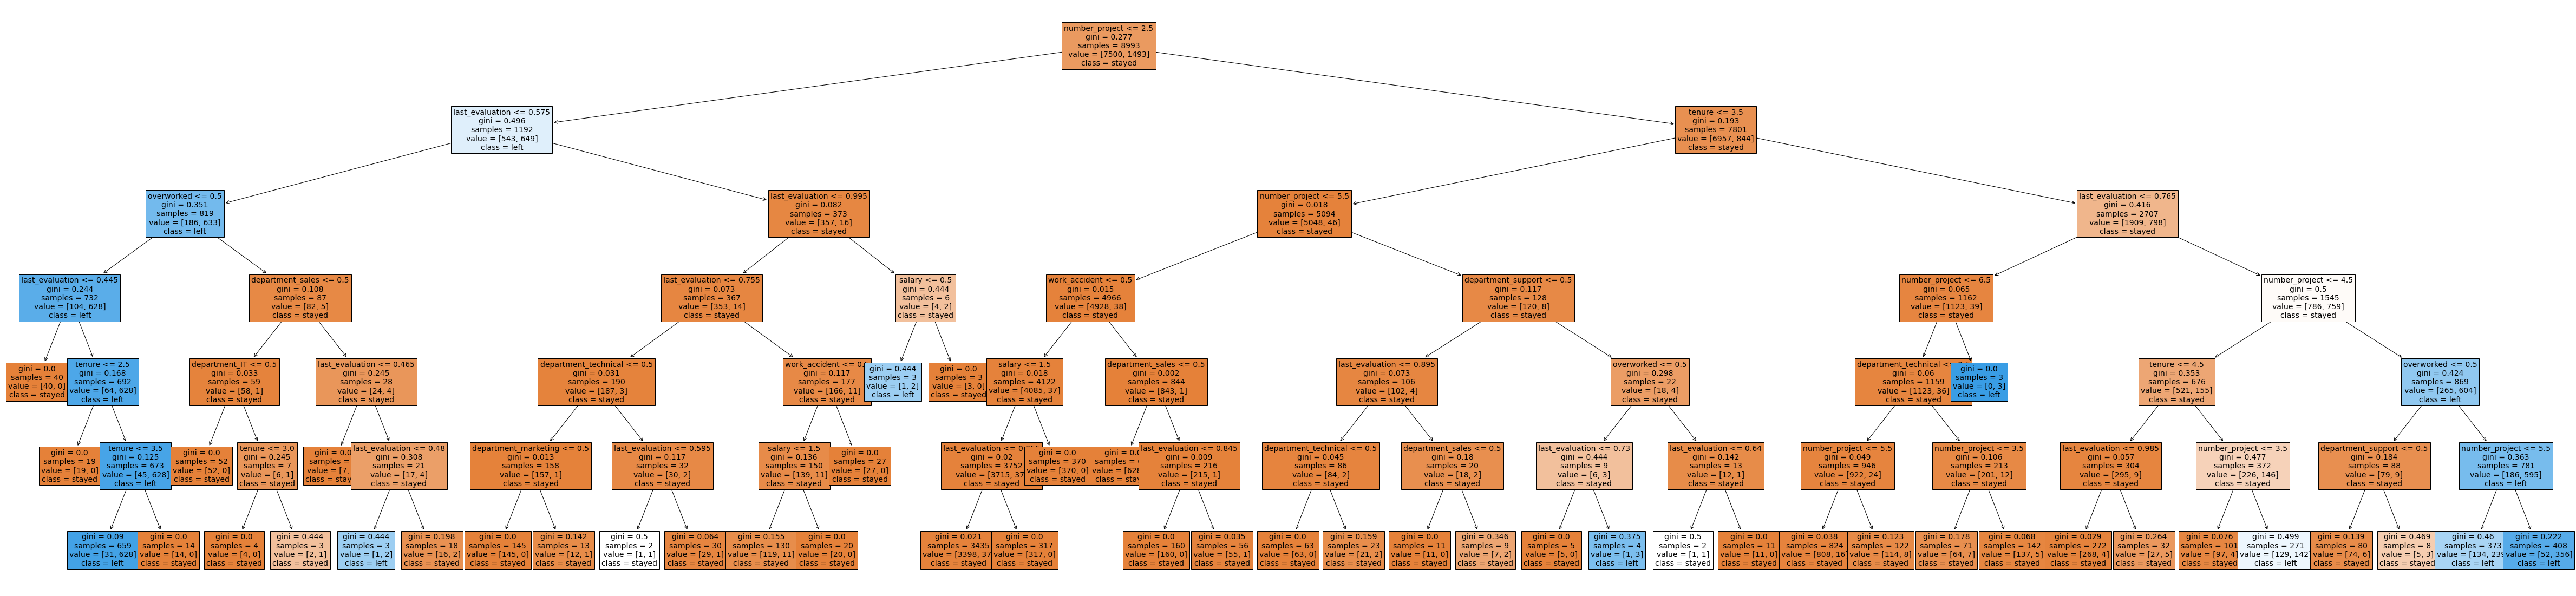

In [120]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [121]:
# Determine decision tree feature importance
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


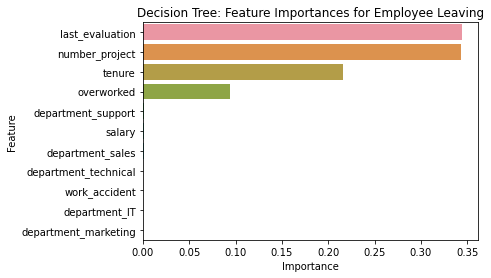

In [122]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The bar plot above indicates that in this decision tree model, the variables last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are the most influential in predicting the outcome variable, left.

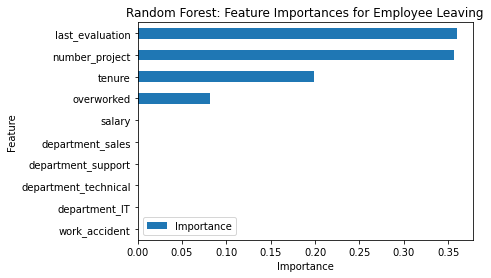

In [123]:
# Plot feature importances for the random forest model
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above demonstrates that in this random forest model, the variables last_evaluation, number_project, tenure, and overworked are the most important, in that order. These variables, which are crucial for predicting the outcome variable, left, are the same as those identified by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Overwork is a Major Factor: The models highlight that employees identified as overworked are at a higher risk of quitting or being fired. This suggests that workload and work-life balance are significant factors influencing employee retention. Key features such as last_evaluation, number_project, tenure, and overworked are crucial for predicting employee outcomes. These variables were consistently identified as highly important in both decision tree and random forest models. The decision tree and random forest models exhibit strong performance metrics, but the random forest slightly outperforms the decision tree, indicating its robustness and ability to handle feature interactions better.

2. Implement policies to cap the number of projects employees can handle to prevent overwork and improve job satisfaction. Consider promoting employees who have been with the company for at least four years or investigate why these long-tenured employees are dissatisfied. Reassess the company's approach to overtime. Either reward employees for working longer hours or reduce the need for excessive overtime. Make sure employees are aware of overtime pay policies and clarify expectations around workload and time off. Conduct company-wide and team-specific discussions to address and improve the work culture. Foster an environment where employees feel valued and supported. Avoid tying high evaluation scores solely to long hours. Implement a more balanced approach that recognizes employees’ contributions and efforts proportionally.

3. Reevaluate the role of the last_evaluation feature to ensure it is not causing data leakage and affecting the model's accuracy. Consider alternative features like performance or satisfaction scores for a more accurate prediction of employee retention. Use cross-validation to verify the model’s robustness and generalizability. This will help ensure that the model performs well on new, unseen data. Explore additional features or external data sources that might provide further insights into employee retention. Finally, consider experimenting with other machine learning models to compare performance and potentially gain better results.

4. Yes, the model could be improved through feature engineering to investigate the potential data leakage issue with last_evaluation and consider incorporating additional features that might be relevant to employee retention. Moreover, fine-tuning the hyperparameters of the random forest model could potentially enhance performance further.

5. Some other questions that might be addressed include: How do employee satisfaction scores correlate with the likelihood of leaving the company? Can we predict employee satisfaction more accurately? What specific aspects of the last_evaluation feature are most predictive? Are there interactions between features that could be explored further? How do trends in employee retention change over time? Are there seasonal or cyclical patterns that could affect retention?

6. Scikit-learn: For model implementation and tuning. Pandas: For data manipulation and preprocessing. Matplotlib/Seaborn: For plotting and visualizing feature importances. Kaggle: For dataset and discussions related to model evaluation.

7. Ensure the model does not disproportionately impact specific groups based on tenure, workload, or evaluation scores. Aim for fairness and avoid reinforcing existing biases. Handle employee data with care, ensuring confidentiality and compliance with data protection regulations. Be transparent about how model predictions are used in decision-making processes. Employees should understand how their data contributes to these predictions.Finally, use the insights from the model to create positive changes that enhance employee well-being, rather than focusing solely on punitive measures.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83% on the test set.

After feature engineering, the decision tree model achieved an AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2% on the test set. The random forest model slightly outperformed the decision tree.

### Conclusion, Recommendations, Next Steps

The models and feature importances confirm that overwork is a significant issue among employees at the company.

To improve employee retention, consider the following recommendations:

- Limit the number of projects each employee can handle.
- Evaluate the possibility of promoting employees who have been with the company for at least four years, or investigate further why long-tenured employees are dissatisfied.
- Either reward employees for working longer hours or reduce the expectation for overtime.
- Ensure employees are aware of the company's overtime pay policies. Make expectations around workload and time off explicit if they are currently unclear.
- Facilitate discussions both company-wide and within teams to address and improve the work culture.
- Avoid reserving high evaluation scores solely for employees who work excessive hours. Implement a more balanced approach to reward employees based on their contributions and efforts.

### Next Steps
There may still be concerns about data leakage. It would be wise to examine how predictions change if the last_evaluation feature is removed from the dataset. This will help determine if evaluations are frequent enough or if they are a key factor in employee retention. Additionally, it may be worthwhile to shift focus to predicting performance scores or satisfaction scores if they have a stronger correlation with employee retention.

For future projects, building a K-means clustering model on this data could provide valuable insights by analyzing different employee segments.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.